## Importing Libraries


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


### Training Image Preprocessing

In [9]:
training_set  = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [10]:
validation_set  = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
) 

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
for x, y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 87.25  78.25  83.25]
   [ 89.25  80.25  85.25]
   [ 87.5   78.5   83.5 ]
   ...
   [109.    99.   107.  ]
   [109.    99.   107.  ]
   [108.5   98.5  106.5 ]]

  [[ 91.5   82.5   87.5 ]
   [ 94.25  85.25  90.25]
   [ 90.25  81.25  86.25]
   ...
   [107.    97.   105.  ]
   [107.5   97.5  105.5 ]
   [108.    98.   106.  ]]

  [[ 95.25  86.25  91.25]
   [ 91.75  82.75  87.75]
   [ 89.75  80.75  85.75]
   ...
   [103.25  93.25 101.25]
   [104.75  94.75 102.75]
   [105.5   95.5  103.5 ]]

  ...

  [[178.25 168.25 166.25]
   [176.5  166.5  164.5 ]
   [173.   163.   161.  ]
   ...
   [191.   185.   189.  ]
   [191.   185.   189.  ]
   [188.5  182.5  186.5 ]]

  [[178.   168.   166.  ]
   [174.5  164.5  162.5 ]
   [176.   166.   164.  ]
   ...
   [186.   180.   184.  ]
   [187.5  181.5  185.5 ]
   [188.25 182.25 186.25]]

  [[166.25 156.25 154.25]
   [161.   151.   149.  ]
   [166.5  156.5  154.5 ]
   ...
   [182.5  176.5  180.5 ]
   [183.5  177.5  181.5 ]
   [185.   179.   18

### To Avoid Overshooting
1. Choose small learning rate default is 0.001 but we are taking 0.0001
2. There may be a chance of underfitting, so increase no. of neuron
3. Add more Convolutional Layer to extract more features from images there may be possibility that model is unable to capture relavant feature or model is facinf ambuiguity due to lack of features so feed with more features


### Buliding Model 


In [13]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [14]:
model = Sequential()


### Building Convolutional Layer

In [15]:
model.add(Conv2D(filters=32, kernel_size=3 ,padding = 'same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=64, kernel_size=3 ,padding = 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
model.add(Conv2D(filters=128, kernel_size=3 ,padding = 'same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
model.add(Conv2D(filters=256, kernel_size=3 ,padding = 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [19]:
model.add(Conv2D(filters=512, kernel_size=3 ,padding = 'same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3 ,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [20]:
model.add(Dropout(0.25)) # To avoid overfitting

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(units=1500, activation='relu'))

In [23]:
model.add(Dropout(0.4))

In [24]:
# output layer
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training 

In [27]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 215s 93ms/step - loss: 1.3382 - accuracy: 0.6074 - val_loss: 0.4905 - val_accuracy: 0.8478
Epoch 2/10
2197/2197 [==============================] - 212s 96ms/step - loss: 0.4241 - accuracy: 0.8671 - val_loss: 0.2780 - val_accuracy: 0.9123
Epoch 3/10
2197/2197 [==============================] - 185s 84ms/step - loss: 0.2537 - accuracy: 0.9183 - val_loss: 0.1994 - val_accuracy: 0.9353
Epoch 4/10
2197/2197 [==============================] - 168s 76ms/step - loss: 0.1825 - accuracy: 0.9409 - val_loss: 0.1796 - val_accuracy: 0.9396
Epoch 5/10
2197/2197 [==============================] - 178s 81ms/step - loss: 0.1315 - accuracy: 0.9568 - val_loss: 0.1256 - val_accuracy: 0.9583
Epoch 6/10
2197/2197 [==============================] - 179s 81ms/step - loss: 0.1025 - accuracy: 0.9658 - val_loss: 0.1739 - val_accuracy: 0.9490
Epoch 7/10
2197/2197 [==============================] - 180s 82ms/step - loss: 0.0863 - accuracy: 0.9722 - val_loss: 0

### Model Evaluation

In [28]:
# Model eveluation on Training set
train_loss , train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 66s 30ms/step - loss: 0.0237 - accuracy: 0.9921


In [29]:
print("Training set loss: ", train_loss)
print("Training set accuracy: ", train_acc)

Training set loss:  0.023703573271632195
Training set accuracy:  0.9921189546585083


In [30]:
# Model eveluation on Validation set
val_loss , val_acc = model.evaluate(validation_set)

550/550 [==============================] - 17s 30ms/step - loss: 0.1194 - accuracy: 0.9689


In [31]:
print("Validation set loss: ", val_loss)
print("Validation set accuracy: ", val_acc)

Validation set loss:  0.1194036453962326
Validation set accuracy:  0.9688709378242493


### Saving Model

In [32]:
model.save("trained_model.keras")

In [33]:
training_history.history

{'loss': [1.3381925821304321,
  0.4241446256637573,
  0.25365597009658813,
  0.18245558440685272,
  0.13151252269744873,
  0.10250481963157654,
  0.08632336556911469,
  0.06914756447076797,
  0.06302201747894287,
  0.055372774600982666],
 'accuracy': [0.6074400544166565,
  0.8671313524246216,
  0.9183014631271362,
  0.9408919811248779,
  0.9568390250205994,
  0.965772807598114,
  0.9721601605415344,
  0.9771818518638611,
  0.9797852039337158,
  0.9818621277809143],
 'val_loss': [0.49046334624290466,
  0.2780359089374542,
  0.1993858516216278,
  0.17960743606090546,
  0.12564116716384888,
  0.17385955154895782,
  0.14148379862308502,
  0.14798592031002045,
  0.1335943043231964,
  0.1194036602973938],
 'val_accuracy': [0.8478260636329651,
  0.9123036861419678,
  0.9352948069572449,
  0.9395629167556763,
  0.9583427906036377,
  0.948952853679657,
  0.9567493796348572,
  0.9577168226242065,
  0.9617573618888855,
  0.9688709378242493]}

In [34]:
# Recording History with json
import json
with open("training_history.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualisation

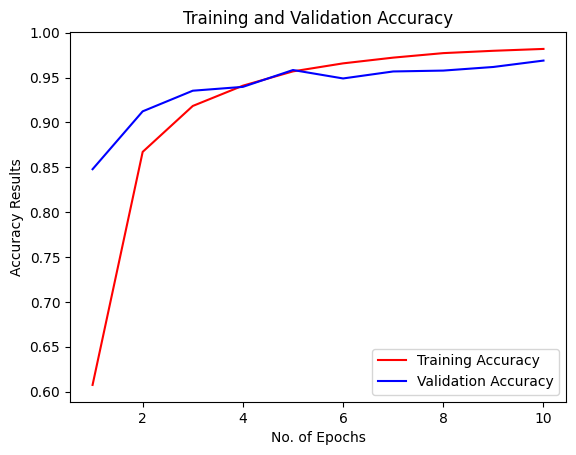

In [35]:
epochs = [i for i in range(1, 11)]
# Plotting the training and validation accuracy 
plt.plot(epochs, training_history.history['accuracy'],color = 'red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Results')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 14s 24ms/step


(array([[1.0000000e+00, 1.0764378e-09, 2.1544589e-12, ..., 7.1545804e-18,
         6.8641610e-18, 7.9708672e-17],
        [9.9999988e-01, 1.3831914e-07, 1.8064903e-09, ..., 3.3908370e-15,
         8.9275375e-14, 6.4749591e-16],
        [1.0000000e+00, 1.3067268e-10, 7.9450942e-13, ..., 9.8461835e-20,
         1.6075502e-17, 2.8597397e-17],
        ...,
        [2.2894109e-09, 5.8051991e-10, 1.1067733e-07, ..., 1.4617747e-10,
         5.1816874e-11, 9.9949896e-01],
        [1.5816265e-12, 2.3120164e-14, 1.4926049e-10, ..., 1.1062290e-13,
         8.6792112e-15, 1.0000000e+00],
        [4.9453737e-17, 2.6083350e-18, 5.0659532e-17, ..., 1.7298350e-17,
         7.3246934e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [39]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true= tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

https://lh7-rt.googleusercontent.com/docsz/AD_4nXdxFm8GO57CMwIa4af3HoZ-vzMYFEmzLEta0PQHXy-Cf5xquOH8o279ZnbUgwPHa5WtRCPafbGe01r_-vx8h_1D-IJd0HaQ1X9e4kPxQzfHiepLIjlCuaEO-qdCxzGtoDkGAx2etQ?key=pcxuQWZkW7dOBy53AeA_Y-VV

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.94      0.97      0.95       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.94      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.93      0.

In [51]:
cm = confusion_matrix(Y_true, predicted_categories)
cm
cm.shape


(38, 38)

### Confusion Matrix Visualisation

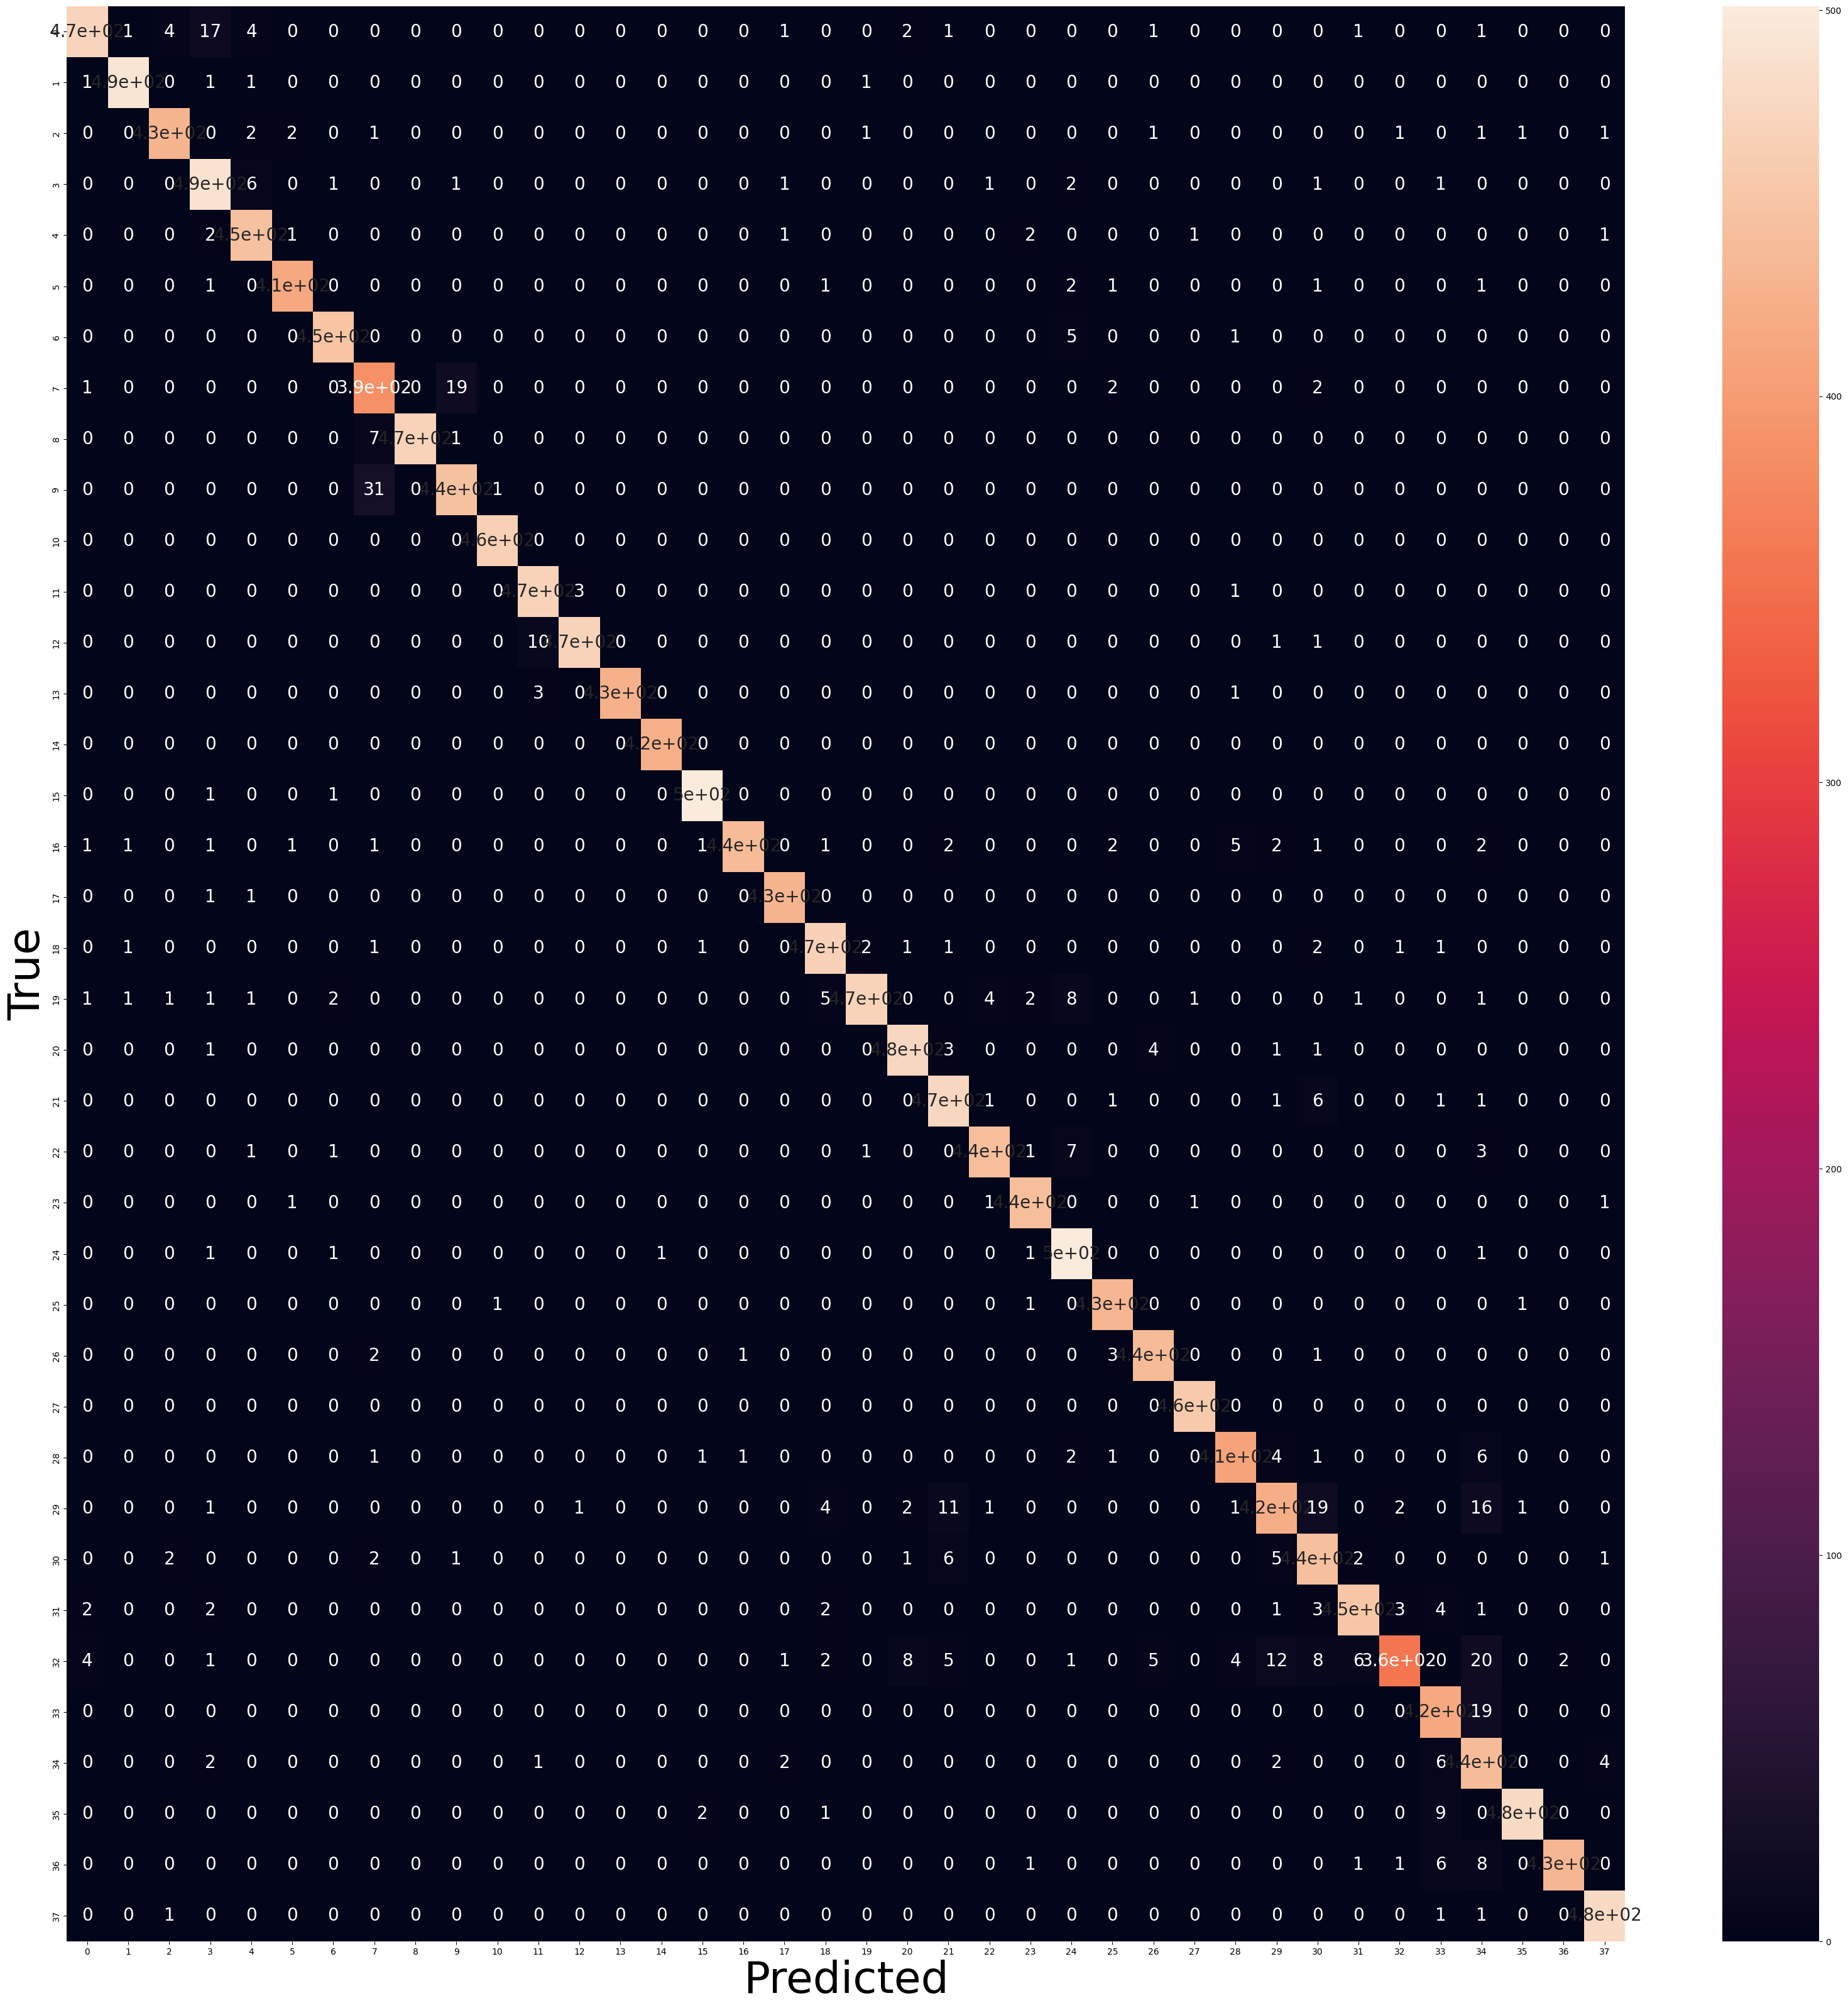

In [60]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True, annot_kws={"size": 20})
plt.xlabel('Predicted',fontsize=50)
plt.ylabel('True', fontsize=50)
plt.show()